# 10 Year Train

# How does the number of epochs of training affect model performance?

In [1]:
from koopman_probabilistic import *
from model_objs import *
import vanilla_benchmark

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import norm, skewnorm, skew

## Pinball Loss

In [2]:
def skew_pinball_loss(data, mus, sigmas, alphas, quantiles=range(10, 100, 10)):
    loss = 0
    for i in range(len(data)):
        for q in quantiles:
            q = q / 100
            quant_pred = skewnorm.ppf(q, alphas[i], loc=mus[i], scale=sigmas[i])
            if quant_pred > data[i]:
                loss += (quant_pred - data[i]) * (1 - q)
            else:
                loss += (data[i] - quant_pred) * q
    return loss / (len(data) * len(quantiles))

In [3]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

## Vanilla Benchmark Forecast

In [4]:
delay = 52 * 24
min_train_start = 0
train_starts = np.linspace(min_train_start, min_train_start + 24 * 365 - 24, 12, endpoint=False).astype(int)
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [5]:
print(list(train_starts))

[0, 728, 1456, 2184, 2912, 3640, 4368, 5096, 5824, 6552, 7280, 8008]


In [6]:
zone_name = "ISONE CA"

ISONE CA
start: 2005-01-01 00:00:00


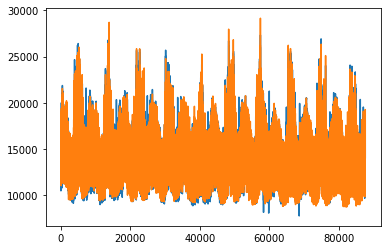

k = 4


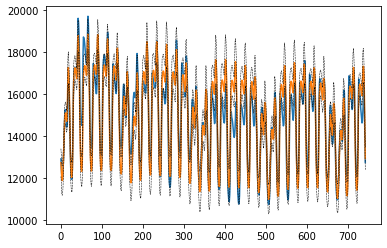

{'ISONE CA': 245.87281938920336}
ISONE CA
start: 2005-01-31 00:00:00


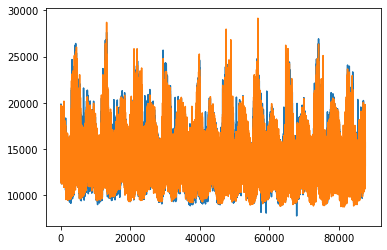

k = 4


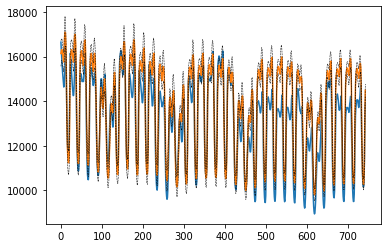

{'ISONE CA': 336.3073724425058}
ISONE CA
start: 2005-03-02 00:00:00


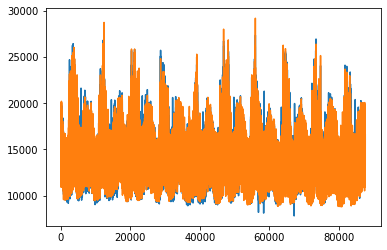

k = 4


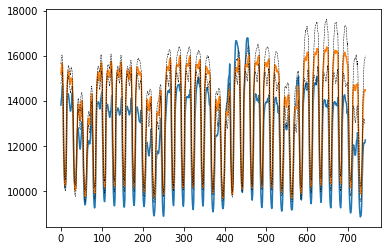

{'ISONE CA': 486.004306191784}
ISONE CA
start: 2005-04-02 00:00:00


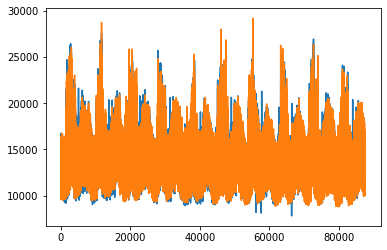

k = 4


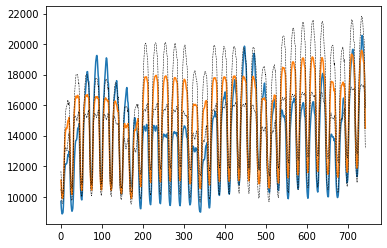

{'ISONE CA': 578.3806019500615}
ISONE CA
start: 2005-05-02 00:00:00


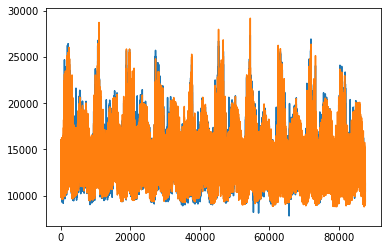

k = 4


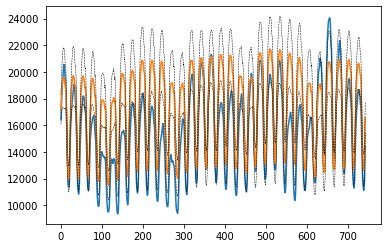

{'ISONE CA': 794.5883168054368}
ISONE CA
start: 2005-06-01 00:00:00


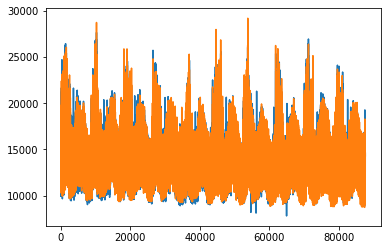

k = 4


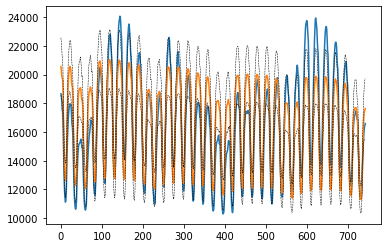

{'ISONE CA': 536.4275184868569}
ISONE CA
start: 2005-07-02 00:00:00


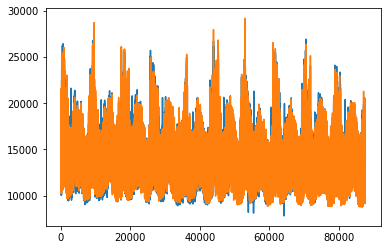

k = 4


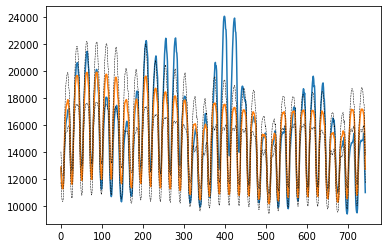

{'ISONE CA': 523.6600830597273}
ISONE CA
start: 2005-08-01 00:00:00


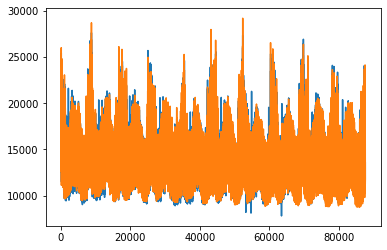

k = 4


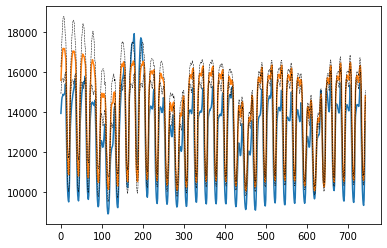

{'ISONE CA': 541.6013878735105}
ISONE CA
start: 2005-08-31 00:00:00


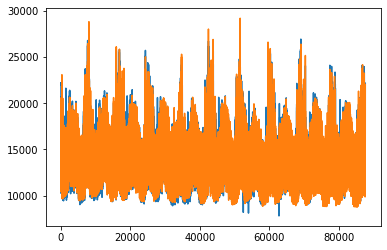

k = 4


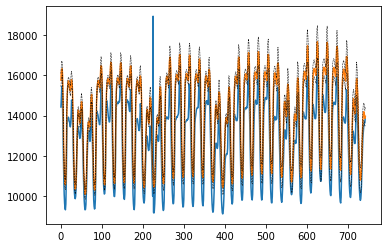

{'ISONE CA': 583.7538337313672}
ISONE CA
start: 2005-10-01 00:00:00


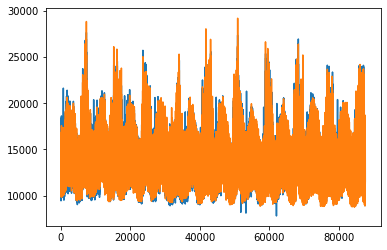

k = 4


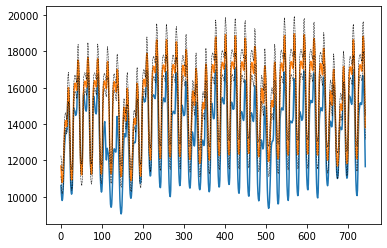

{'ISONE CA': 738.2094094369056}
ISONE CA
start: 2005-10-31 00:00:00


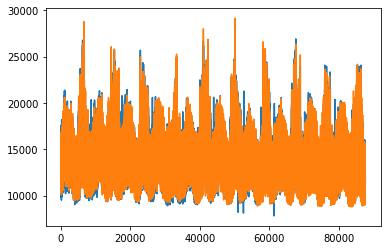

k = 4


ValueError: operands could not be broadcast together with shapes (744,) (232,) 

In [7]:
vanilla_losses = []
for train_start in train_starts:
    vanilla_losses.append(vanilla_benchmark.get_lossesGEFCom(start=train_start, delay=delay, zones=[zone_name], train_through=(10 * 365 + 2) * 24, plot=True)[zone_name])

In [8]:
for loss in vanilla_losses:
    print(np.round(loss, 1), end="\t")

245.9	336.3	486.0	578.4	794.6	536.4	523.7	541.6	583.8	738.2	

In [9]:
import json

with open("GEFCom2017//GEFCom2017-Qual//GEFCom2017Qual2005-2015.json") as f:
    all_data = json.loads(f.read())
    
data = np.transpose(np.array([all_data[zone_name]["DEMAND"]], dtype=np.float64))

In [10]:
# rescale data
x_original = data
mean = np.mean(data, axis=0, keepdims=True)
rnge = np.max(data, axis=0, keepdims=True) - np.min(data, axis=0, keepdims=True)
data = (data - mean) / rnge
print("data", data.shape)

data (96408, 1)


# Forecasting mean, variance, and skewness of Skew-Normal distribution

In [11]:
cumul_iters = np.array([0, 10, 25, 50, 100, 150, 200, 300])
iter_steps = cumul_iters[1:] - cumul_iters[:-1]

In [12]:
%matplotlib inline
z_scores_lists = []
test_z_scores_lists = []
losses_lists = []
relative_perfs = []

TRAIN START: 0 = 2005-01-01 00:00:00
x (89640, 1)
xt (87648, 1)
working on 10 ...
Final loss: -1.6858347953509547


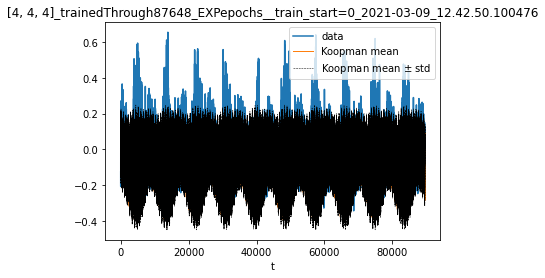

actual overall mean: 0  predicted mean: -0.056474794


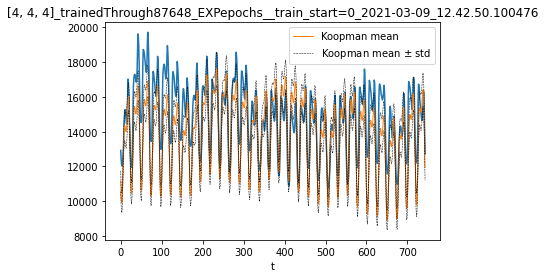

pinball_loss: 523.8357538363318
-113.05150977551861% performance relative to vanilla benchmark





working on 25 ...
Loss at iteration 10: -1.8141759150577565
Final loss: -1.829352831216686


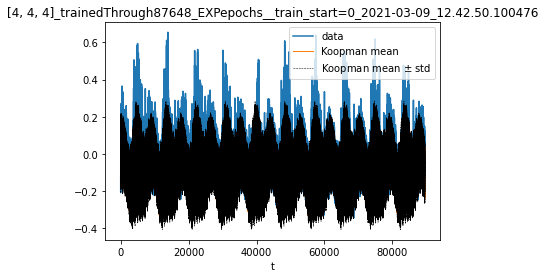

actual overall mean: 0  predicted mean: -0.06841679


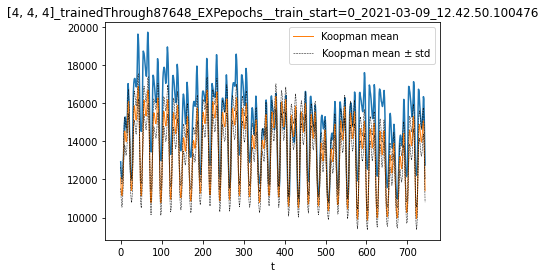

pinball_loss: 549.7523267349266
-123.59215146294736% performance relative to vanilla benchmark





working on 50 ...
Loss at iteration 10: -1.872797606017566
Final loss: -1.8975302675598473


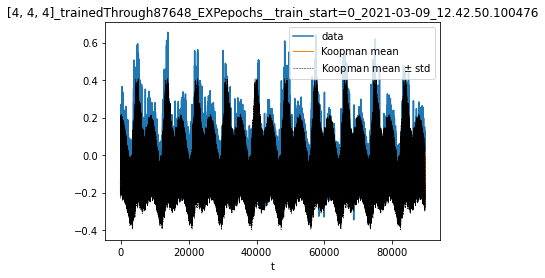

actual overall mean: 0  predicted mean: -0.05164065


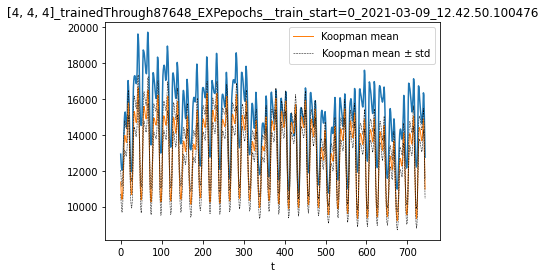

pinball_loss: 792.6655881362636
-222.38845680681644% performance relative to vanilla benchmark





working on 100 ...
Loss at iteration 10: -1.9095516769900482
Final loss: -1.9335246378802342


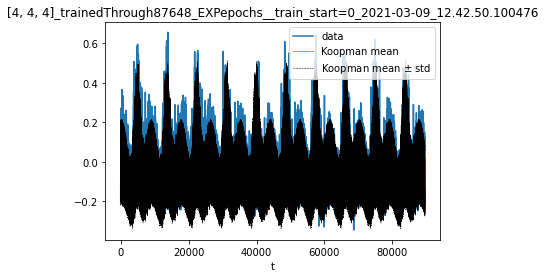

actual overall mean: 0  predicted mean: -0.031946767


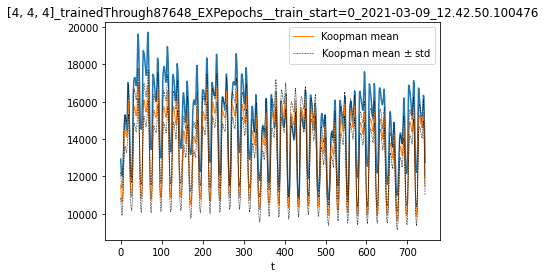

pinball_loss: 554.6232012367755
-125.57320594223023% performance relative to vanilla benchmark





working on 150 ...
Loss at iteration 10: -1.9388927895194563
Final loss: -1.9558903784010926


C:\Users\ATMal\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


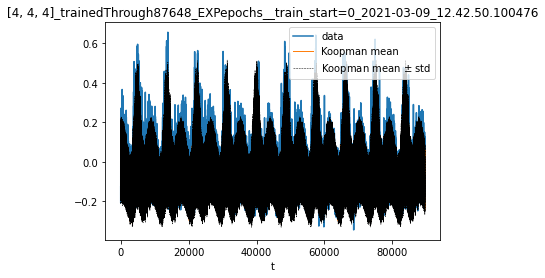

actual overall mean: 0  predicted mean: -0.029075753


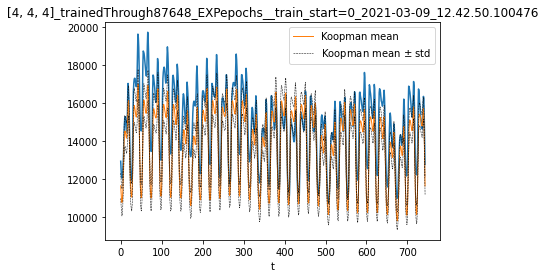

pinball_loss: 501.6154453877405
-104.01419182236262% performance relative to vanilla benchmark





working on 200 ...
Loss at iteration 10: -1.9597981240846258
Final loss: -1.9713434020293472


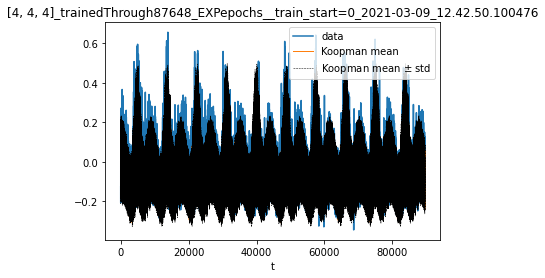

actual overall mean: 0  predicted mean: -0.028177807


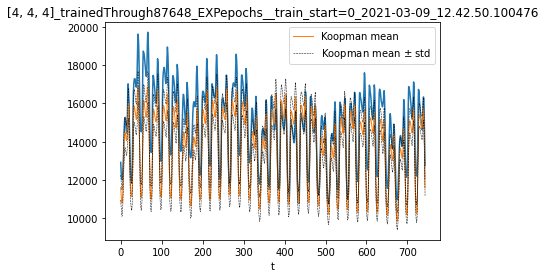

pinball_loss: 506.4760812993828
-105.99108212024797% performance relative to vanilla benchmark





working on 300 ...
Loss at iteration 10: -1.974268990022807
Loss at iteration 60: -1.9857644365617222
Final loss: -1.9929639526601939


C:\Users\ATMal\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


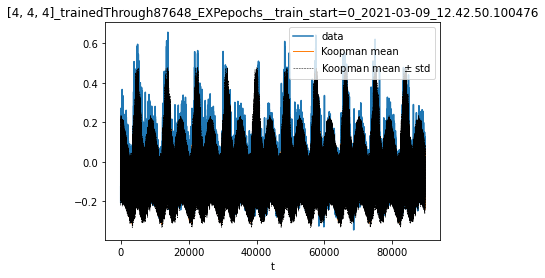

actual overall mean: 0  predicted mean: -0.03181845


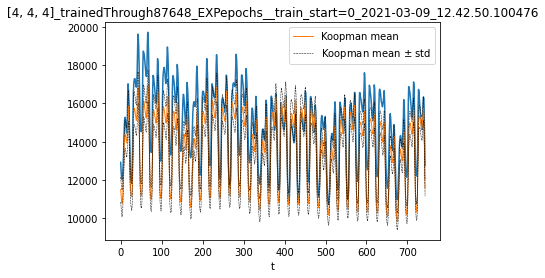

pinball_loss: 534.7669143501569
-117.4973694443426% performance relative to vanilla benchmark





TRAIN START: 2184 = 2005-04-02 00:00:00
x (89640, 1)
xt (87648, 1)
working on 10 ...
Final loss: -1.6987490254991988


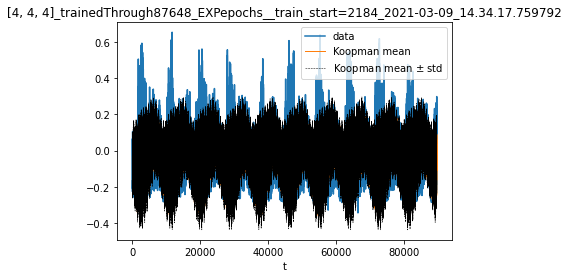

actual overall mean: 0  predicted mean: -0.008148311


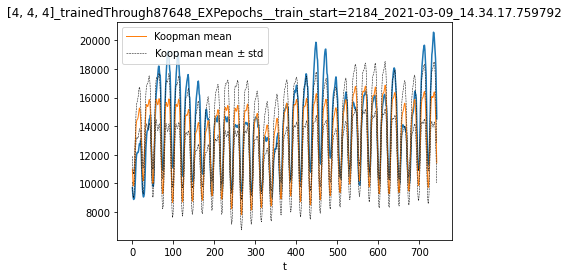

pinball_loss: 500.9916582012476
13.380279955429042% performance relative to vanilla benchmark





working on 25 ...
Loss at iteration 10: -1.7922379120041618
Final loss: -1.7855621988883494


C:\Users\ATMal\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


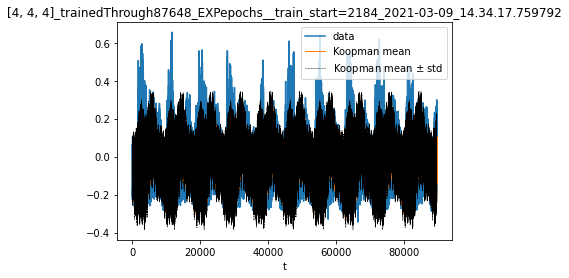

actual overall mean: 0  predicted mean: -0.0022842244


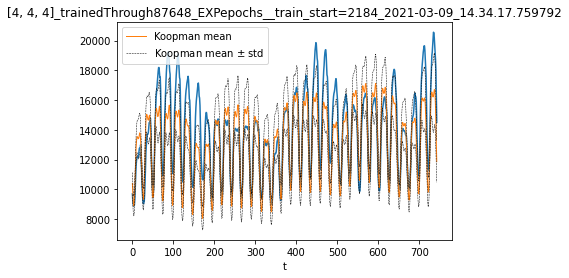

pinball_loss: 480.9959528687954
16.83746805354902% performance relative to vanilla benchmark





working on 50 ...
Loss at iteration 10: -1.8419239046987639
Final loss: -1.8843434287798724


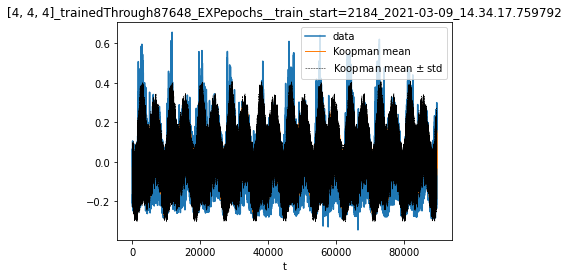

actual overall mean: 0  predicted mean: 0.02607077


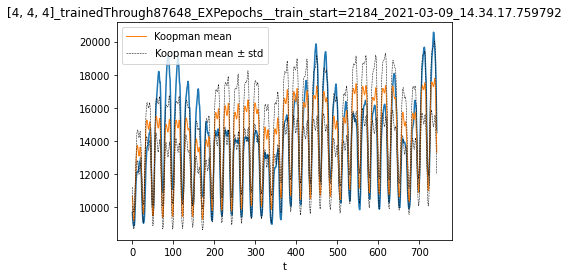

pinball_loss: 445.39515243047566
22.99272297017113% performance relative to vanilla benchmark





working on 100 ...
Loss at iteration 10: -1.895453093221332


In [ ]:
for month, train_start in list(enumerate(train_starts))[::3]:
    print("TRAIN START:", train_start, "=", all_data[zone_name]["Date"][train_start])
    z_scores_lists.append([])
    test_z_scores_lists.append([])
    losses_lists.append([])
    relative_perfs.append([])
    
    train_through = (10 * 365 + 2) * 24
    predict_through = train_through + 24 * 31 + delay  
    x = data[train_start:]
    x = x[:predict_through]
    xt = x[:train_through]
    num_freqs = [4, 4, 4]
    num_fourier = 4
    print("x", x.shape)
    print("xt", xt.shape)
    
    now = ("_".join(str(datetime.now()).split())).replace(":", ".")
    data_name = "EXPepochs_" + f"_train_start={train_start}_" + now

        
    ### TRAIN ###
    model = AlternatingSkewNLL(x_dim=xt.shape[1], num_freqs=num_freqs, n=256)
    k = KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
    
    k.find_fourier_omegas(xt, hard_code=[24, 168, 24 * 365.25 / 12, 24 * 365.25])
    
    for i, iters in enumerate(iter_steps):
        print("working on", cumul_iters[i+1], "...")
    
        k.fit(xt, iterations=iters, verbose=False, cutoff=0, weight_decay=1e-3, lr_theta=1e-4, lr_omega=0);
        
        fname = "forecasts//" + data_name + f"trained{train_start}-{train_through}_{cumul_iters[i+1]}soFar_{num_freqs}"
        mu_file = fname + "mu.npy"
        sigma_file = fname + "sigma.npy"
        alpha_file = fname + "alpha.npy"    
    
        ### FORECAST ###
        params = k.predict(predict_through)
        mu_hat, sigma_hat, a_hat = params
        np.save(mu_file, mu_hat)
        np.save(sigma_file, sigma_hat)
        np.save(alpha_file, a_hat)

        mean_hat = model.mean(params)
        std_hat = model.std(params)

        dim = 0
        plt.figure()
        # plt.scatter(np.arange(-slc), x[slc:], label="data")
        plt.plot(x[:predict_through, dim], label="data")
        plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
        plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
        plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
        #plt.plot(a_hat[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
        #plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")

        plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
        plt.xlabel("t")
        plt.legend()
        plt.show()

        ### ANALYTICS ###
        print("actual overall mean:", 0, " predicted mean:", np.mean(mean_hat[:train_through]))

        z_scores_lists[-1].append((x[:train_through] - mean_hat[:train_through]) / std_hat[:train_through])
        test_z_scores_lists[-1].append(
            (x[train_through + delay:predict_through] - mean_hat[train_through + delay:predict_through]) 
             / std_hat[train_through + delay:predict_through])

        ### PERFORMANCE ###

        #Skew-Normal distribution Rescaling to de-normalize data because pinball loss is not scale-invariant
        test_start = train_through + delay
        sigh, ah = sigma_hat[test_start: predict_through], a_hat[test_start: predict_through]
        delta = ah / (1 + ah ** 2) ** 0.5
        muh = mu_hat[test_start: predict_through] * rnge + (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
        muh = muh + mean - (rnge - 1) * delta * sigh * (2 / np.pi) ** 0.5
        sigh = sigh * rnge
        mean_hat = model.mean([muh, sigh, ah])
        std_hat = model.std([muh, sigh, ah])

        plt.figure()
        plt.plot(x_original[train_start:][test_start: predict_through])
        plt.plot(mean_hat[:, dim], label="Koopman mean", linewidth=1)
        plt.plot(mean_hat[:, dim] + std_hat[:, dim], "--", color="black", label="Koopman mean $\pm$ std", linewidth=0.5)
        plt.plot(mean_hat[:, dim] - std_hat[:, dim], "--", color="black", linewidth=0.5)
        # plt.plot(ah[:, dim], color="red", linewidth=0.3, label="Koopman $\\alpha$")
        # plt.plot(std_hat[:, dim], color="green", linewidth=0.7, label="Koopman std")
        plt.title(f"{num_freqs}_trainedThrough{train_through}_" + data_name)
        plt.xlabel("t")
        plt.legend()
        plt.show()

        loss = skew_pinball_loss(x_original[train_start:][test_start: predict_through], muh, sigh, ah)[0]
        relative = (1 - loss/vanilla_losses[month]) * 100
        print("pinball_loss:", loss)
        print(f"{relative}% performance relative to vanilla benchmark" + "\n"*5)
        losses_lists[-1].append(loss)
        relative_perfs[-1].append(relative)

%matplotlib notebook

# Figures

ValueError: x and y must have same first dimension, but have shapes (9,) and (5,)

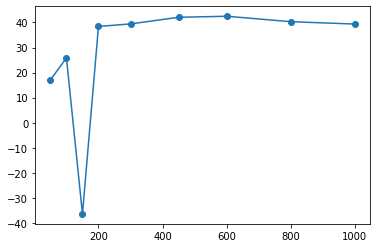

In [14]:
plt.figure()
plt.plot(cumul_iters[1:], relative_perfs[0], label="Jan")
plt.scatter(cumul_iters[1:], relative_perfs[0])
plt.plot(cumul_iters[1:], relative_perfs[1], label="Apr")
plt.scatter(cumul_iters[1:], relative_perfs[1])
plt.plot(cumul_iters[1:], relative_perfs[2], label="Jul")
plt.scatter(cumul_iters[1:], relative_perfs[2])
plt.plot(cumul_iters[1:], relative_perfs[3], label="Oct")
plt.scatter(cumul_iters[1:], relative_perfs[3])
plt.legend()
plt.title("performance versus training epochs")
plt.xlabel("epochs")
plt.ylabel("% improvement over benchmark")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

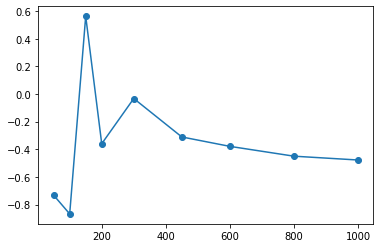

In [16]:
plt.figure()
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[0], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[1], axis=1), label="Apr")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[1], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[2], axis=1), label="Jul")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[2], axis=1))
plt.plot(cumul_iters[1:], np.mean(z_scores_lists[3], axis=1), label="Oct")
plt.scatter(cumul_iters[1:], np.mean(z_scores_lists[3], axis=1))
plt.legend()
plt.title("bias versus training epochs")
plt.xlabel("epochs")
plt.ylabel("average model-standardized residual")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

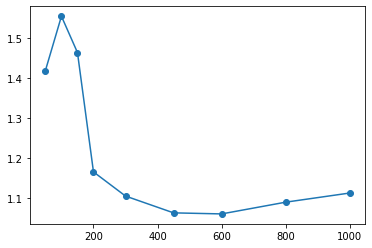

In [17]:
plt.figure()
plt.plot(cumul_iters[1:], np.std(z_scores_lists[0], axis=1), label="Jan")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[0], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[1], axis=1), label="Apr")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[1], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[2], axis=1), label="Jul")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[2], axis=1))
plt.plot(cumul_iters[1:], np.std(z_scores_lists[3], axis=1), label="Oct")
plt.scatter(cumul_iters[1:], np.std(z_scores_lists[3], axis=1))
plt.legend()
plt.title("overconfidence versus training epochs")
plt.xlabel("epochs")
plt.ylabel("st. dev. of model-standardized residuals")
plt.show()

In [13]:
# for tables
for loss in losses[:6]:
    print(np.round(loss, 1), end="\t")
print("")
for rel in relative_perf[:6]:
    print(np.round(rel, 1), end="%\t")

524.0	
17.9%	

mean of z-scores in month Jan: 0.09620634846219067 std of z-scores: 1.064015874090296


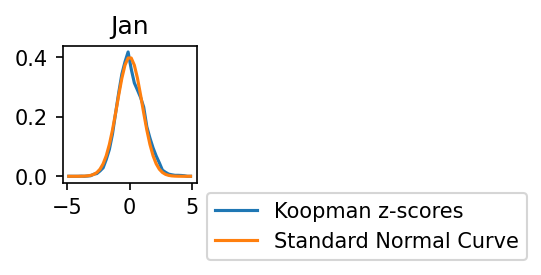

In [19]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(8, 6))
for i, z_scores in enumerate(z_scores_list):
    month = 2*i
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
    print(f"mean of z-scores in month {months[month]}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(2, 3, i + 1)
    plt.plot(z_axis, z_hist, label="Koopman z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
    plt.title(months[month])
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

mean of z-scores in month 0: 1.144567994758033 std of z-scores: 1.7973945769457311


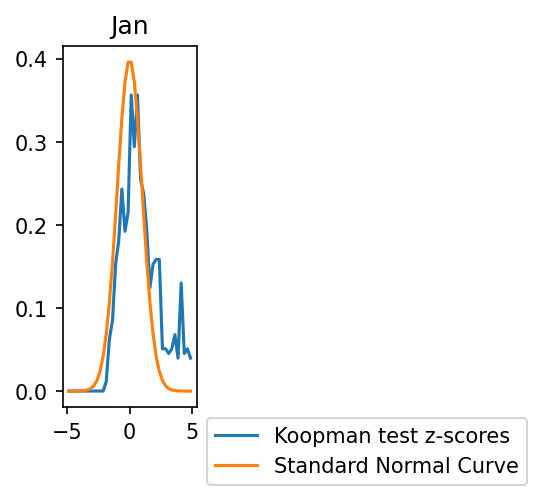

In [15]:
%matplotlib inline
plt.subplots(dpi=150, figsize=(8, 6))
for i, z_scores in enumerate(test_z_scores_list):
    month = 2 * i
    z_hist, bin_edges = np.histogram(z_scores, bins=40, range=(-5, 5), density=True)
    z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
    print(f"mean of z-scores in month {month}:", np.mean(z_scores), "std of z-scores:", np.std(z_scores))
    
    plt.subplot(2, 3, i + 1)
    plt.plot(z_axis, z_hist, label="Koopman test z-scores")
    plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
    plt.title(months[month])
#     plt.xlabel("z")
plt.legend(loc="upper left", bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

In [16]:
idx = 6
for z_scores in z_scores_list[:idx]:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list[:idx]:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in z_scores_list[:idx]:
    print(np.round(skew(z_scores)[0], 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(np.mean(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(np.std(z_scores), 2), end="\t")
print()
for z_scores in test_z_scores_list[:idx]:
    print(np.round(skew(z_scores)[0], 2), end="\t")

0.1	
1.06	
0.41	
1.14	
1.8	
0.91	

In [ ]:
z_scores_lists = np.array(z_scores_lists)
test_z_scores_lists = np.array(test_z_scores_lists)
losses_lists = np.array(losses_list)
relative_perfs = np.array(relative_perfs)

In [ ]:
np.save(data_name + "z_scores_lists.npy", z_scores_lists)
np.save(data_name + "test_z_scores_lists.npy", test_z_scores_lists)
np.save(data_name + "relative_perfs.npy", relative_perfs)
np.save(data_name + "losses_lists.npy", losses_lists)